In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as sch
from sklearn.neighbors import NearestNeighbors

In [2]:
df=pd.read_csv('DS3_C6_S3_Clustering_AbsenteeismAtWork_Data_Project.csv',delimiter=';')
df

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,11,14,7,3,1,289,36,13,33,264.604,...,0,1,2,1,0,1,90,172,30,8
736,1,11,7,3,1,235,11,14,37,264.604,...,0,3,1,0,0,1,88,172,29,4
737,4,0,0,3,1,118,14,13,40,271.219,...,0,1,1,1,0,8,98,170,34,0
738,8,0,0,4,2,231,35,14,39,271.219,...,0,1,2,1,0,2,100,170,35,0


In [3]:
pd.options.display.max_columns=None
df

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,97,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,97,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,97,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,11,14,7,3,1,289,36,13,33,264.604,93,0,1,2,1,0,1,90,172,30,8
736,1,11,7,3,1,235,11,14,37,264.604,93,0,3,1,0,0,1,88,172,29,4
737,4,0,0,3,1,118,14,13,40,271.219,95,0,1,1,1,0,8,98,170,34,0
738,8,0,0,4,2,231,35,14,39,271.219,95,0,1,2,1,0,2,100,170,35,0


### Data pre-processing

In [4]:
df.shape #shape of data

(740, 21)

In [5]:
df.columns  #columns

Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours'],
      dtype='object')

In [6]:
df.info() #null values and data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               740 non-null    int64  
 1   Reason for absence               740 non-null    int64  
 2   Month of absence                 740 non-null    int64  
 3   Day of the week                  740 non-null    int64  
 4   Seasons                          740 non-null    int64  
 5   Transportation expense           740 non-null    int64  
 6   Distance from Residence to Work  740 non-null    int64  
 7   Service time                     740 non-null    int64  
 8   Age                              740 non-null    int64  
 9   Work load Average/day            740 non-null    float64
 10  Hit target                       740 non-null    int64  
 11  Disciplinary failure             740 non-null    int64  
 12  Education             

In [7]:
df.describe() #central tendencies

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,18.017568,19.216216,6.324324,3.914865,2.544595,221.329730,29.631081,12.554054,36.450000,271.490235,94.587838,0.054054,1.291892,1.018919,0.567568,0.072973,0.745946,79.035135,172.114865,26.677027,6.924324
std,11.021247,8.433406,3.436287,1.421675,1.111831,66.952223,14.836788,4.384873,6.478772,39.058116,3.779313,0.226277,0.673238,1.098489,0.495749,0.260268,1.318258,12.883211,6.034995,4.285452,13.330998
min,1.000000,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205.917000,81.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,9.000000,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,244.387000,93.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,264.249000,95.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,26.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,294.217000,97.000000,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378.884000,100.000000,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


In [8]:
df.drop('ID',axis=1,inplace=True)

### EDA

In [9]:
hist=['Transportation expense','Distance from Residence to Work','Service time','Age','Work load Average/day ','Absenteeism time in hours']

[ 92.  36. 195.  81. 129.  51.  90.  16.   0.  50.]
[  6. 153.  50.  39. 189.  51.  42.   7.   1. 202.]
[ 31.  23. 146. 166. 158.  62. 147.   0.   2.   5.]
[177.  86.  79. 199.  92.  24.  32.  42.   1.   8.]
[ 57. 103. 153. 163.  78.  79.  35.  40.   0.  32.]
[677.  19.  22.   7.   3.   3.   3.   0.   1.   5.]


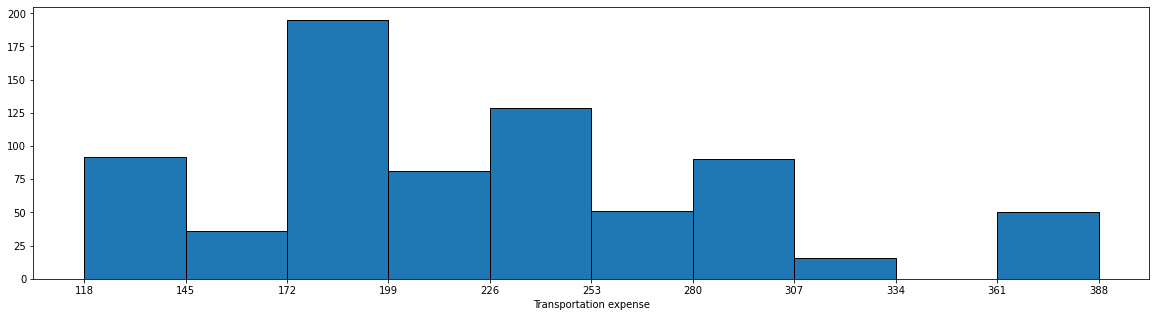

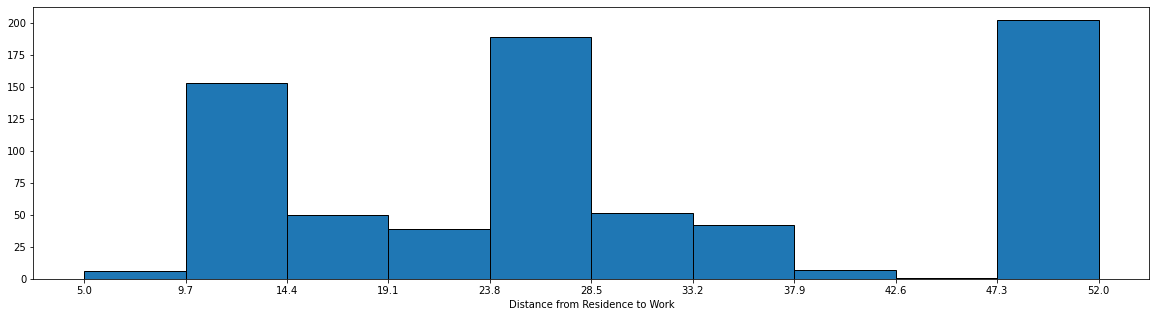

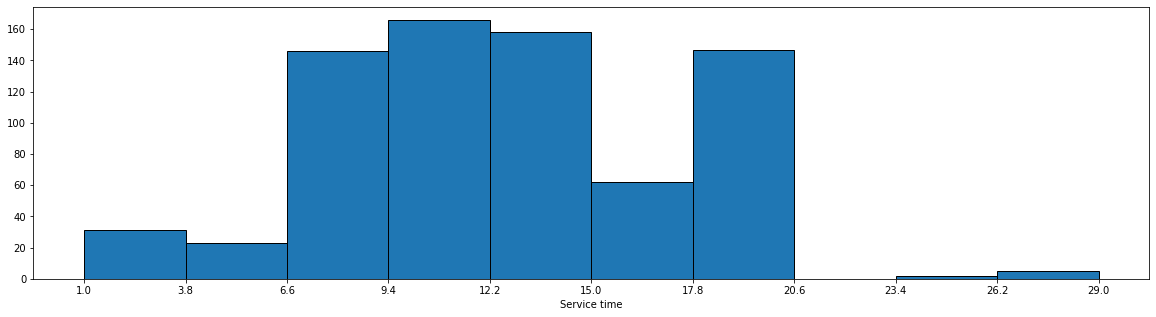

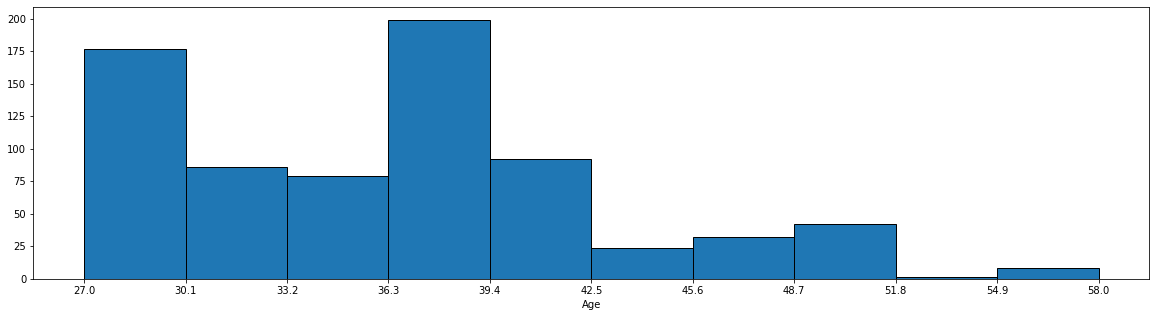

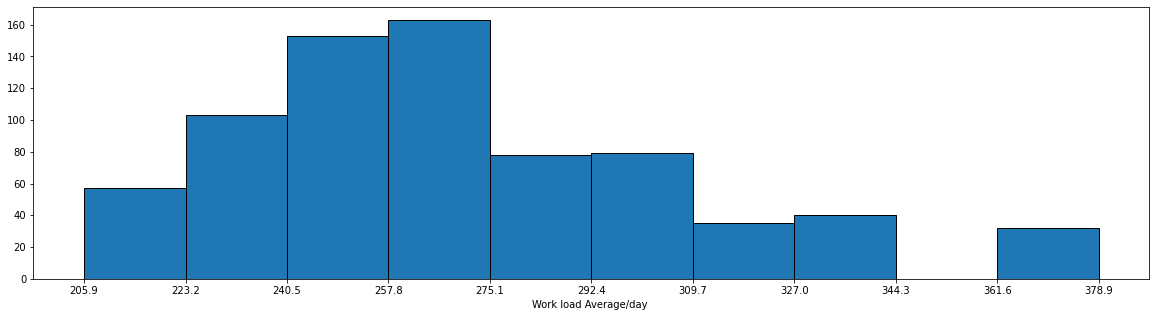

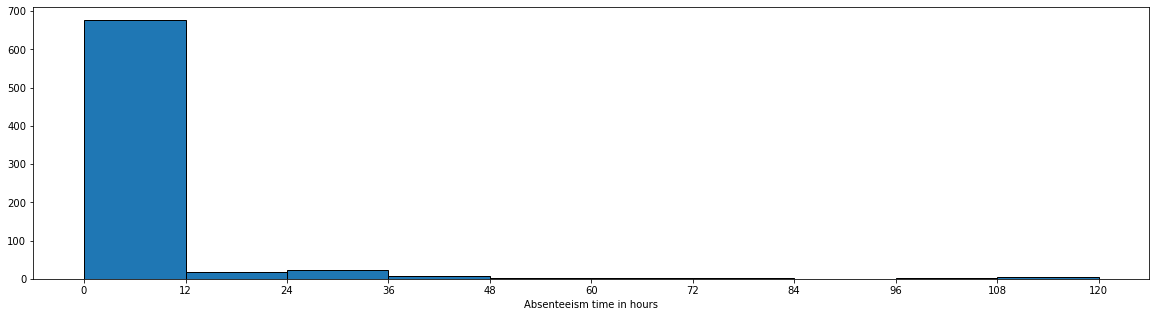

In [10]:
for i in hist:
    plt.figure(figsize=(20,5))
    n,bins,patches=plt.hist(df[i],edgecolor='black')
    print(n)
    plt.xticks(bins)
    plt.xlabel(i)

In [11]:
count=['Month of absence','Day of the week','Seasons','Disciplinary failure']

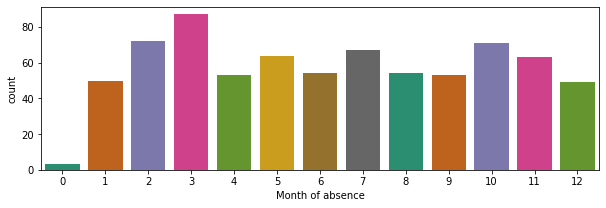

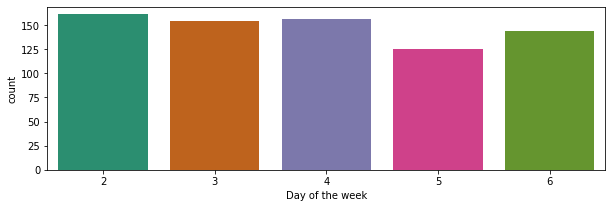

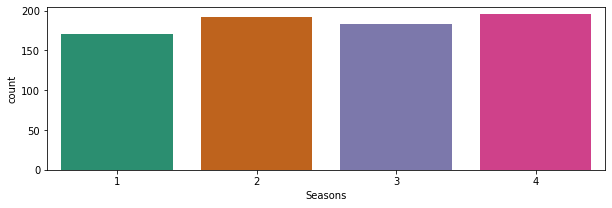

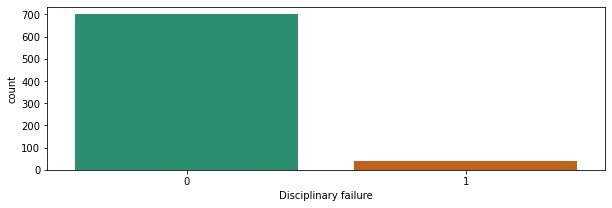

In [12]:
for i in count:
    plt.figure(figsize=(10,3))
    sns.countplot(df[i],palette='Dark2');

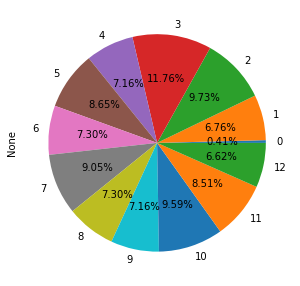

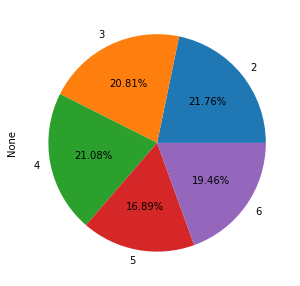

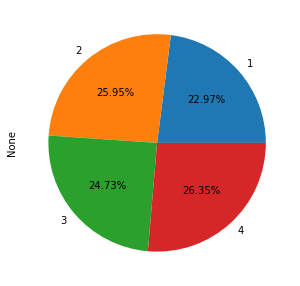

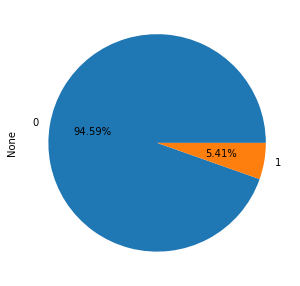

In [13]:
for i in count:
    plt.figure(figsize=(20,5))
    df.groupby(i).size().plot(kind='pie',autopct='%.2f%%');

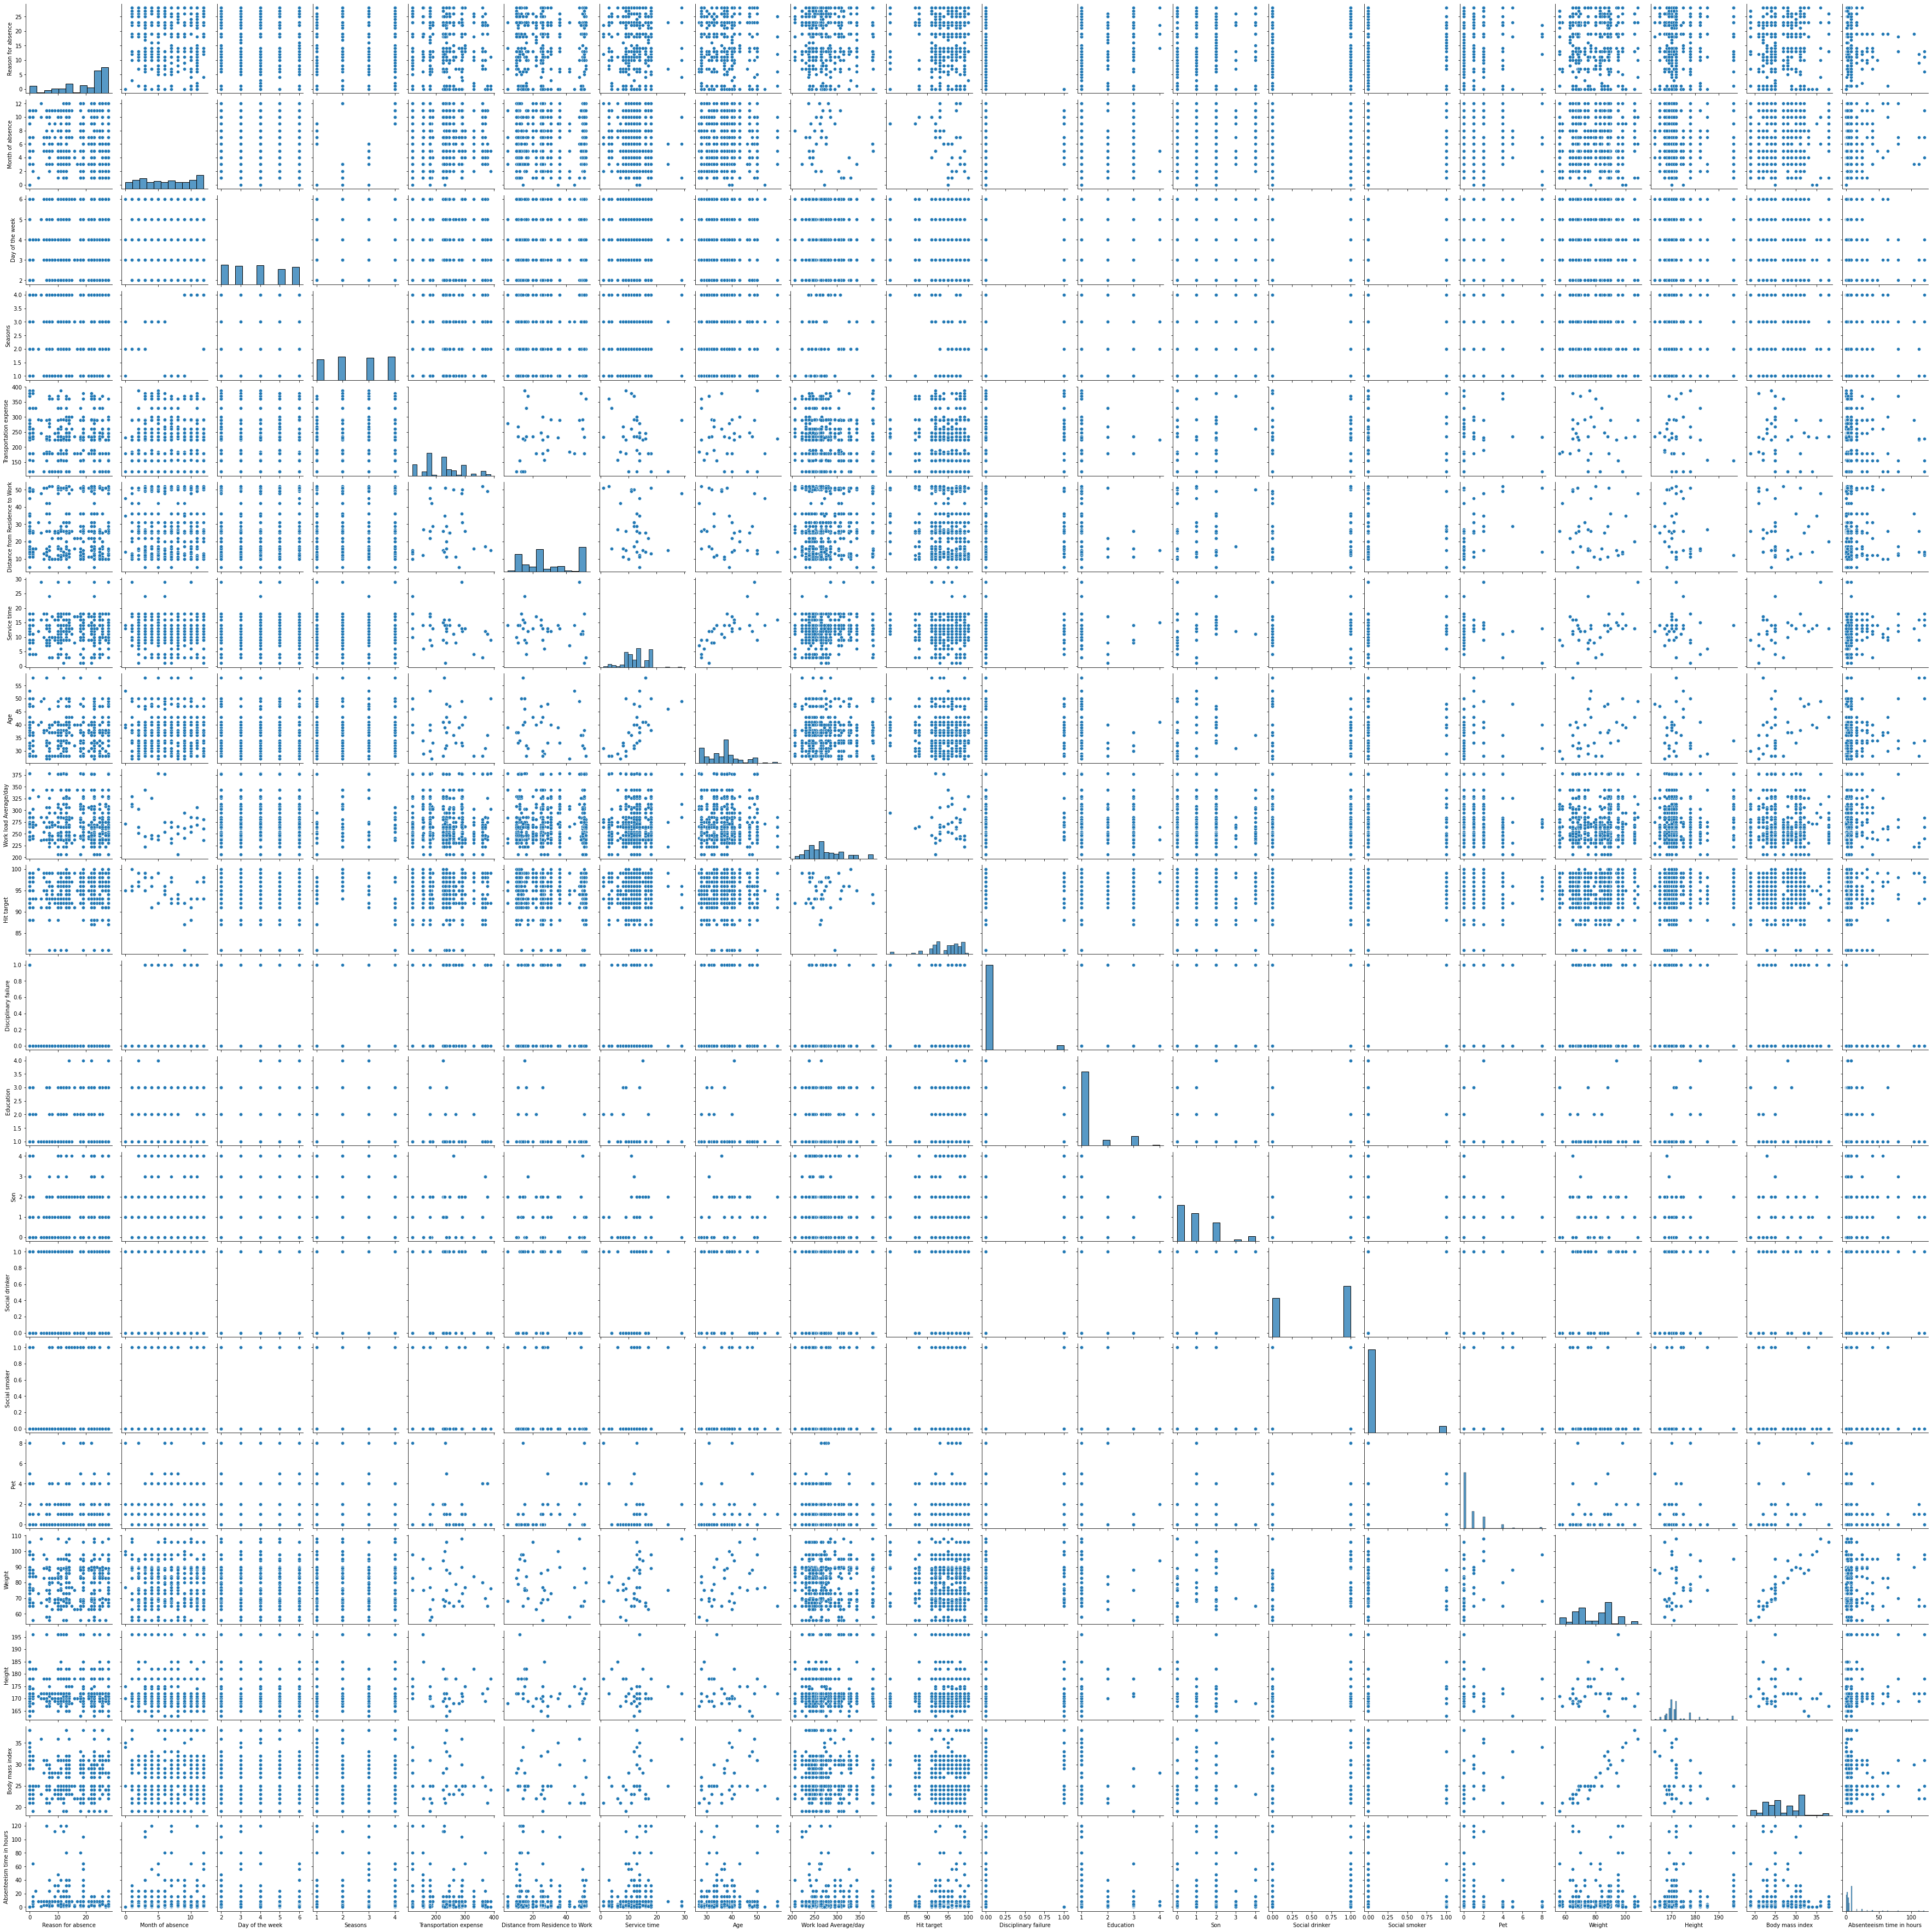

In [14]:
sns.pairplot(df,kind='scatter',palette='Dark2_r');

### Feature transformation

In [15]:
df1=df.copy()
df1.drop('Absenteeism time in hours',axis=1,inplace=True)

In [16]:
scaler=preprocessing.StandardScaler()   #Standardization
df_sd=pd.DataFrame(scaler.fit_transform(df1),columns=df1.columns)
df_sd.head()

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index
0,0.804938,0.196763,-0.643947,-1.390175,1.011408,0.429556,0.101770,-0.532868,-0.818212,0.638686,-0.239046,-0.433857,0.893723,0.872872,-0.280566,0.19285,0.851673,-0.019046,0.775932
1,-2.280124,0.196763,-0.643947,-1.390175,-1.544379,-1.121694,1.242825,2.092860,-0.818212,0.638686,4.183300,-0.433857,-0.017234,0.872872,-0.280566,-0.56624,1.473056,0.975828,1.009438
2,0.448970,0.196763,0.059924,-1.390175,-0.632665,1.441240,1.242825,0.239405,-0.818212,0.638686,-0.239046,-0.433857,-0.928191,0.872872,-0.280566,-0.56624,0.774000,-0.350671,1.009438
3,-1.449530,0.196763,0.763796,-1.390175,0.861947,-1.661258,0.329981,0.393859,-0.818212,0.638686,-0.239046,-0.433857,0.893723,0.872872,3.564226,-0.56624,-0.857131,-0.682295,-0.625100
4,0.448970,0.196763,0.763796,-1.390175,1.011408,0.429556,0.101770,-0.532868,-0.818212,0.638686,-0.239046,-0.433857,0.893723,0.872872,-0.280566,0.19285,0.851673,-0.019046,0.775932


### Feature Extraction

In [17]:
from sklearn.decomposition import PCA
pca=PCA(n_components=12)
pca_train=pca.fit_transform(df_sd)
evr=pca.explained_variance_ratio_
evr

array([0.1757789 , 0.11881117, 0.10207668, 0.07936779, 0.07303862,
       0.0649402 , 0.05688779, 0.0526267 , 0.05053725, 0.04421876,
       0.04151369, 0.03416261])

### Prediction using clustering

In [18]:
#KMeans

In [19]:
np.sqrt(740)

27.202941017470888

In [20]:
inertia=[]
for i in range(2,10):
    k=KMeans(n_clusters=i)
    k.fit_predict(df_sd)
    inertia.append(k.inertia_)

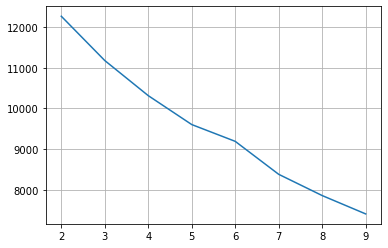

In [21]:
plt.plot(range(2,10),inertia)
plt.grid(True)

In [22]:
for i in range(2,30):
    k=KMeans(n_clusters=i,random_state=42)
    k.fit_predict(df_sd)
    ss=silhouette_score(df_sd,k.labels_)
    print('Silhouette Score for',i,'clusters:',round(ss,4))
    

Silhouette Score for 2 clusters: 0.1315
Silhouette Score for 3 clusters: 0.1455
Silhouette Score for 4 clusters: 0.1426
Silhouette Score for 5 clusters: 0.153
Silhouette Score for 6 clusters: 0.1696
Silhouette Score for 7 clusters: 0.1871
Silhouette Score for 8 clusters: 0.1838
Silhouette Score for 9 clusters: 0.1915
Silhouette Score for 10 clusters: 0.1921
Silhouette Score for 11 clusters: 0.2063
Silhouette Score for 12 clusters: 0.2268
Silhouette Score for 13 clusters: 0.2357
Silhouette Score for 14 clusters: 0.2149
Silhouette Score for 15 clusters: 0.2307
Silhouette Score for 16 clusters: 0.245
Silhouette Score for 17 clusters: 0.2441
Silhouette Score for 18 clusters: 0.2544
Silhouette Score for 19 clusters: 0.2531
Silhouette Score for 20 clusters: 0.2492
Silhouette Score for 21 clusters: 0.267
Silhouette Score for 22 clusters: 0.27
Silhouette Score for 23 clusters: 0.2693
Silhouette Score for 24 clusters: 0.2514
Silhouette Score for 25 clusters: 0.2553
Silhouette Score for 26 clust

In [23]:
km=KMeans(n_clusters=3)   #without extraction
yp=km.fit_predict(df_sd)

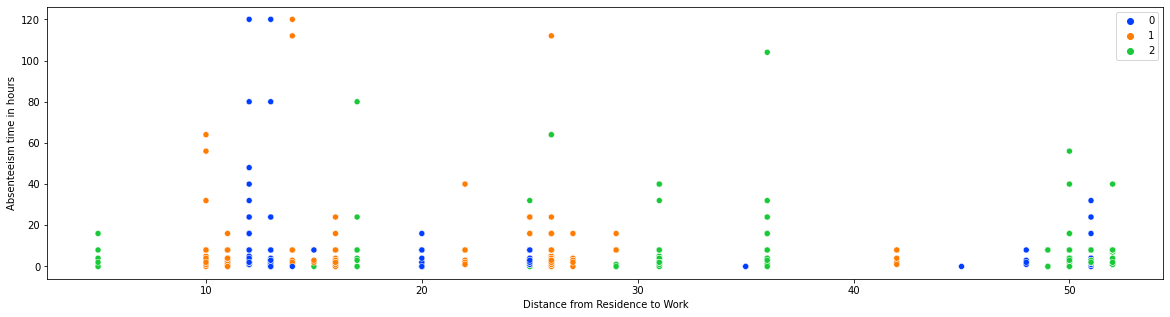

In [24]:
plt.figure(figsize=(20,5))
sns.scatterplot(df['Distance from Residence to Work'],df['Absenteeism time in hours'],hue=yp,palette='bright');

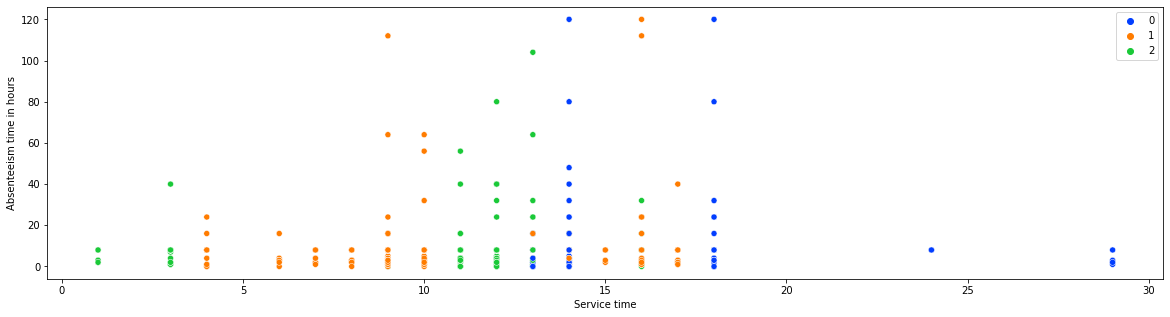

In [25]:
plt.figure(figsize=(20,5))
sns.scatterplot(df['Service time'],df['Absenteeism time in hours'],hue=yp,palette='bright');

In [26]:
wcss=[]
for i in range(2,10):
    k=KMeans(n_clusters=i)
    k.fit_predict(pca_train)
    wcss.append(k.inertia_)

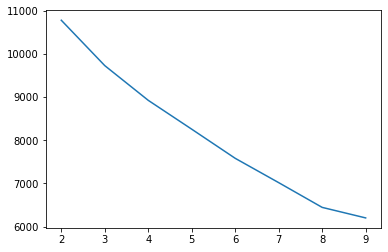

In [27]:
plt.plot(range(2,10),wcss);

In [28]:
for i in range(2,30):
    k=KMeans(n_clusters=i,random_state=42)
    k.fit_predict(pca_train)
    ss=silhouette_score(pca_train,k.labels_)
    print('Silhouette Score for',i,'clusters:',round(ss,4))
    

Silhouette Score for 2 clusters: 0.1443
Silhouette Score for 3 clusters: 0.1467
Silhouette Score for 4 clusters: 0.1712
Silhouette Score for 5 clusters: 0.1597
Silhouette Score for 6 clusters: 0.1864
Silhouette Score for 7 clusters: 0.2082
Silhouette Score for 8 clusters: 0.2261
Silhouette Score for 9 clusters: 0.2366
Silhouette Score for 10 clusters: 0.2207
Silhouette Score for 11 clusters: 0.2215
Silhouette Score for 12 clusters: 0.246
Silhouette Score for 13 clusters: 0.2629
Silhouette Score for 14 clusters: 0.2605
Silhouette Score for 15 clusters: 0.2615
Silhouette Score for 16 clusters: 0.2596
Silhouette Score for 17 clusters: 0.2559
Silhouette Score for 18 clusters: 0.2607
Silhouette Score for 19 clusters: 0.2612
Silhouette Score for 20 clusters: 0.248
Silhouette Score for 21 clusters: 0.2736
Silhouette Score for 22 clusters: 0.2535
Silhouette Score for 23 clusters: 0.2733
Silhouette Score for 24 clusters: 0.2757
Silhouette Score for 25 clusters: 0.2703
Silhouette Score for 26 cl

In [29]:
kmeans=KMeans(n_clusters=3)  #with feature extraction
yp1=kmeans.fit_predict(pca_train)

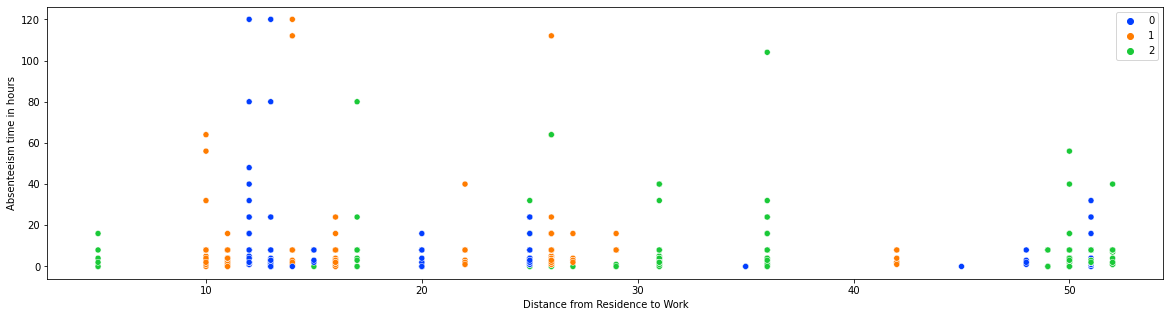

In [30]:
plt.figure(figsize=(20,5))
sns.scatterplot(df['Distance from Residence to Work'],df['Absenteeism time in hours'],hue=yp1,palette='bright');

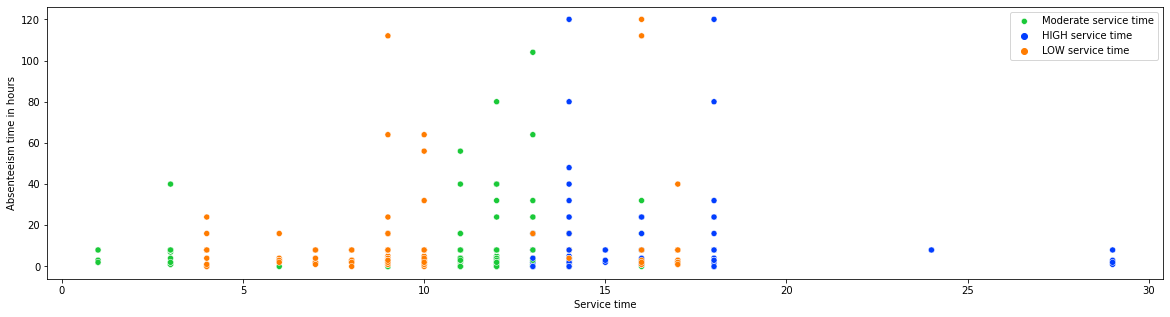

In [65]:
plt.figure(figsize=(20,5))
sns.scatterplot(df['Service time'],df['Absenteeism time in hours'],hue=yp1,palette='bright');
plt.legend(['Moderate service time','HIGH service time','LOW service time'])

In [32]:
#Agglomerative clustering

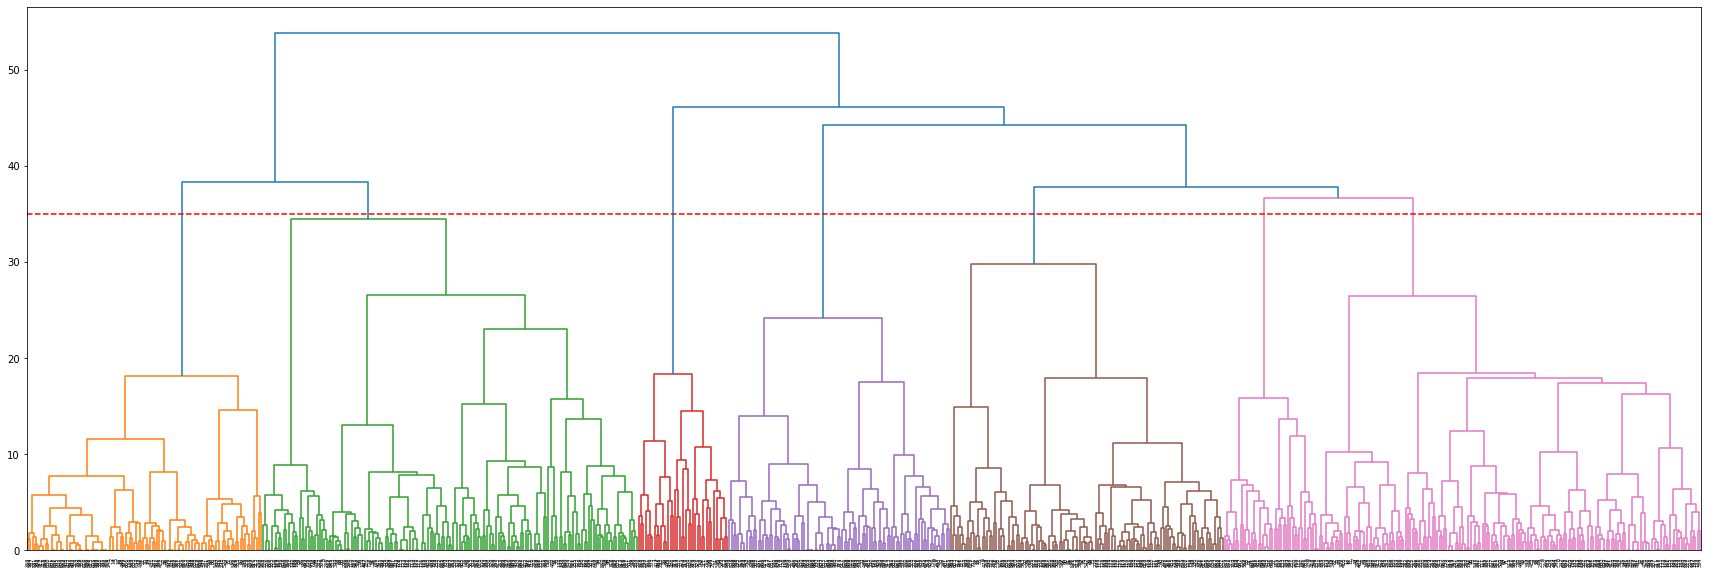

In [33]:
plt.figure(figsize=(30,10))
den=sch.dendrogram(sch.linkage(df_sd,method='ward'),labels=df.index)
plt.axhline(y=35,color='red',linestyle='--')

In [34]:
agg=AgglomerativeClustering(n_clusters=7) #without feature extraction
yp2=agg.fit_predict(df_sd)

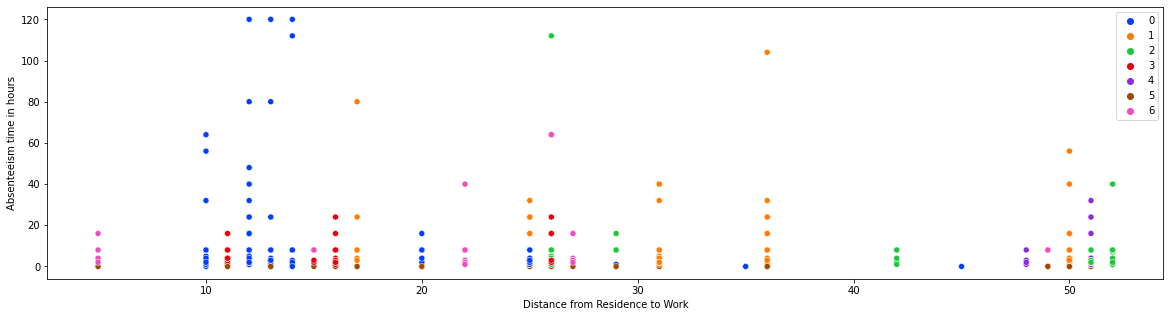

In [35]:
plt.figure(figsize=(20,5))
sns.scatterplot(df['Distance from Residence to Work'],df['Absenteeism time in hours'],hue=yp2,palette='bright');

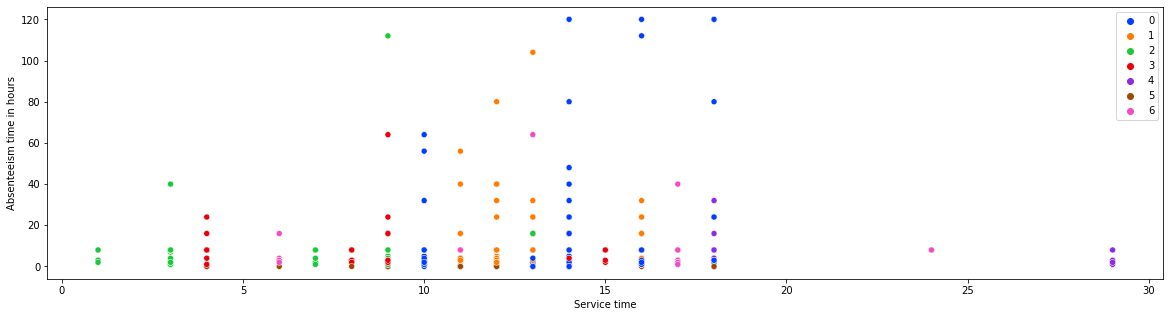

In [36]:
plt.figure(figsize=(20,5))
sns.scatterplot(df['Service time'],df['Absenteeism time in hours'],hue=yp2,palette='bright');

In [37]:
sab=silhouette_score(df_sd,yp2)
print('Silhouette score:',round(sab,4))

Silhouette score: 0.1715


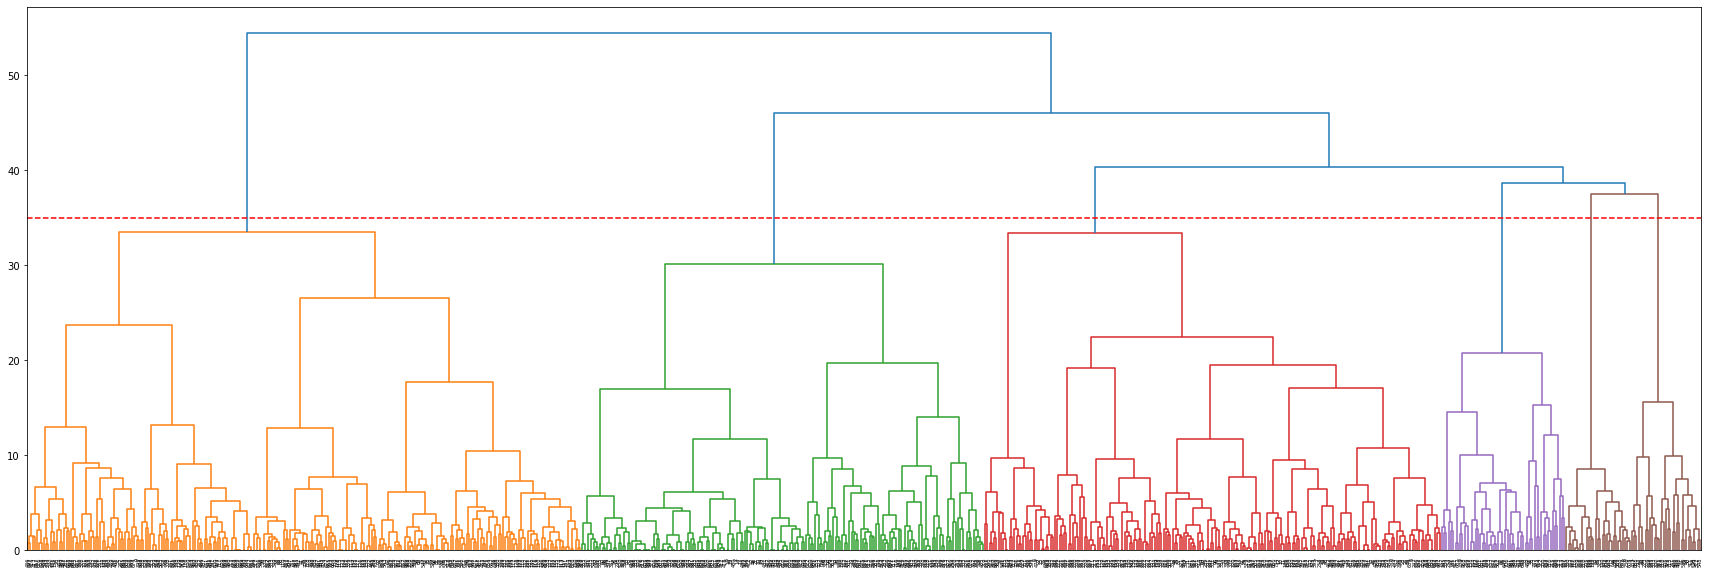

In [38]:
plt.figure(figsize=(30,10))
den=sch.dendrogram(sch.linkage(pca_train,method='ward'),labels=df.index)
plt.axhline(y=35,color='red',linestyle='--')

In [39]:
agg1=AgglomerativeClustering(n_clusters=6)
yp3=agg1.fit_predict(pca_train)

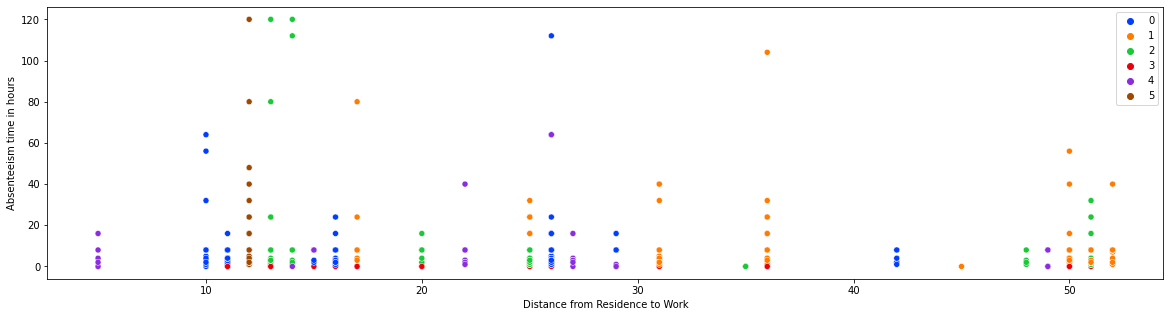

In [40]:
plt.figure(figsize=(20,5))
sns.scatterplot(df['Distance from Residence to Work'],df['Absenteeism time in hours'],hue=yp3,palette='bright');

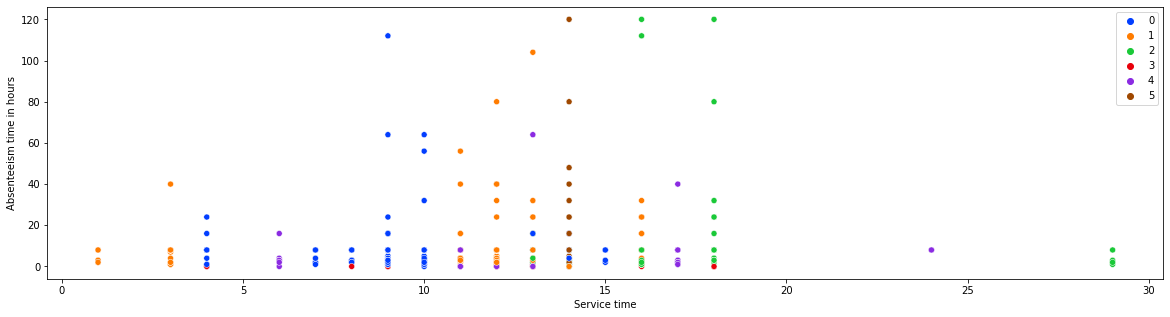

In [41]:
plt.figure(figsize=(20,5))
sns.scatterplot(df['Service time'],df['Absenteeism time in hours'],hue=yp3,palette='bright');

In [42]:
sar=silhouette_score(pca_train,yp3)
print('Silhouette score:',round(sar,4))

Silhouette score: 0.1861


In [43]:
#DBSCAN

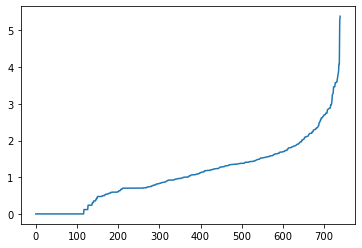

In [44]:
n=NearestNeighbors(n_neighbors=2)
nb=n.fit(df_sd)
distances,indices=nb.kneighbors(df_sd)
distances=np.sort(distances,axis=0)
distances=distances[:,1]
plt.plot(distances)

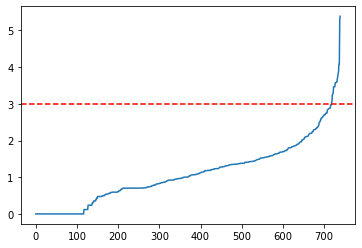

In [45]:
plt.plot(distances)
plt.axhline(y=3,color='red',linestyle='--');

In [71]:
eps=3

In [78]:
for i in range(15,26):
    d=DBSCAN(eps=eps,min_samples=i)
    db=d.fit_predict(df_sd)
    x=db+2
    y=np.bincount(x)
    z=np.nonzero(y)[0]
    result=list(zip(z,y[z]))
    print('for eps=',eps,' and min samples',i,'clusters:',result)

for eps= 3  and min samples 15 clusters: [(1, 158), (2, 108), (3, 110), (4, 35), (5, 90), (6, 55), (7, 72), (8, 28), (9, 27), (10, 15), (11, 20), (12, 22)]
for eps= 3  and min samples 16 clusters: [(1, 198), (2, 105), (3, 110), (4, 90), (5, 34), (6, 55), (7, 55), (8, 28), (9, 27), (10, 20), (11, 18)]
for eps= 3  and min samples 17 clusters: [(1, 198), (2, 105), (3, 110), (4, 55), (5, 34), (6, 90), (7, 55), (8, 28), (9, 27), (10, 20), (11, 18)]
for eps= 3  and min samples 18 clusters: [(1, 203), (2, 105), (3, 110), (4, 55), (5, 34), (6, 90), (7, 55), (8, 28), (9, 18), (10, 18), (11, 24)]
for eps= 3  and min samples 19 clusters: [(1, 247), (2, 105), (3, 107), (4, 55), (5, 31), (6, 89), (7, 55), (8, 27), (9, 24)]
for eps= 3  and min samples 20 clusters: [(1, 249), (2, 105), (3, 107), (4, 55), (5, 31), (6, 89), (7, 55), (8, 26), (9, 23)]
for eps= 3  and min samples 21 clusters: [(1, 252), (2, 105), (3, 107), (4, 55), (5, 89), (6, 30), (7, 55), (8, 24), (9, 23)]
for eps= 3  and min samples 

In [83]:
db=DBSCAN(eps=3,min_samples=19) #with out extraction
yp4=db.fit_predict(df_sd)

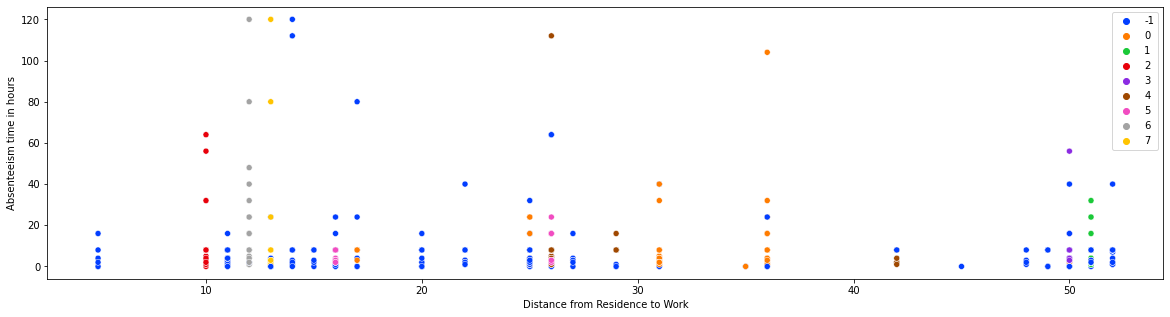

In [84]:
plt.figure(figsize=(20,5))
sns.scatterplot(df['Distance from Residence to Work'],df['Absenteeism time in hours'],hue=yp4,palette='bright');

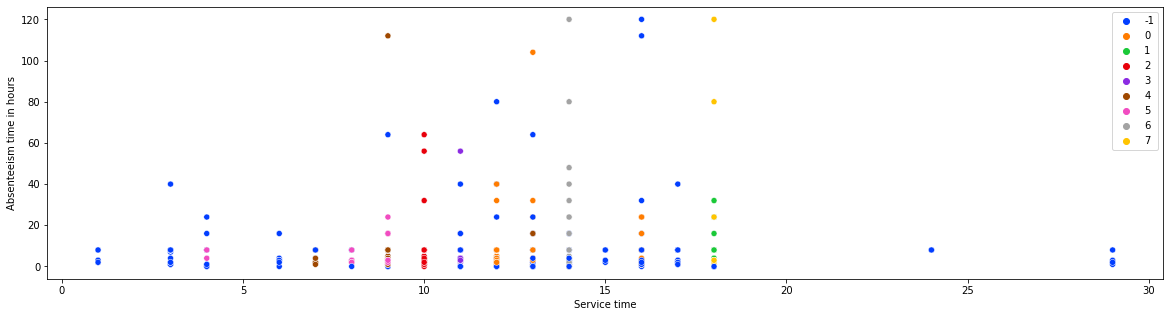

In [85]:
plt.figure(figsize=(20,5))
sns.scatterplot(df['Service time'],df['Absenteeism time in hours'],hue=yp4,palette='bright');

In [86]:
sdb=silhouette_score(df_sd,yp4)
print('Silhouette score:',round(sdb,4))

Silhouette score: 0.133


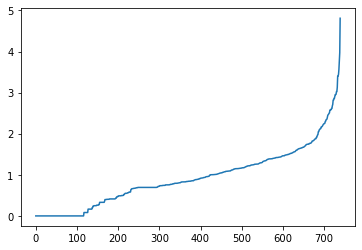

In [87]:
n=NearestNeighbors(n_neighbors=2)
nb=n.fit(pca_train)
distances,indices=nb.kneighbors(pca_train)
distances=np.sort(distances,axis=0)
distances=distances[:,1]
plt.plot(distances)

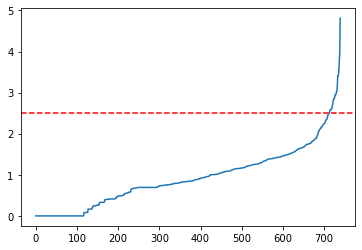

In [88]:
plt.plot(distances)
plt.axhline(y=2.5,color='red',linestyle='--');

In [89]:
eps=2.5

In [90]:
for i in range(15,20):
    d=DBSCAN(eps=eps,min_samples=i)
    db=d.fit_predict(pca_train)
    x=db+2
    y=np.bincount(x)
    z=np.nonzero(y)[0]
    result=list(zip(z,y[z]))
    print('for eps=',eps,' and min samples',i,'clusters:',result)

for eps= 2.5  and min samples 15 clusters: [(1, 232), (2, 233), (3, 107), (4, 55), (5, 47), (6, 25), (7, 22), (8, 19)]
for eps= 2.5  and min samples 16 clusters: [(1, 239), (2, 227), (3, 107), (4, 55), (5, 47), (6, 24), (7, 22), (8, 19)]
for eps= 2.5  and min samples 17 clusters: [(1, 244), (2, 223), (3, 107), (4, 55), (5, 47), (6, 23), (7, 22), (8, 19)]
for eps= 2.5  and min samples 18 clusters: [(1, 246), (2, 221), (3, 107), (4, 55), (5, 47), (6, 23), (7, 19), (8, 22)]
for eps= 2.5  and min samples 19 clusters: [(1, 291), (2, 221), (3, 107), (4, 55), (5, 47), (6, 19)]


In [91]:
db=DBSCAN(eps=2.5,min_samples=15) #with extraction
yp5=db.fit_predict(pca_train)

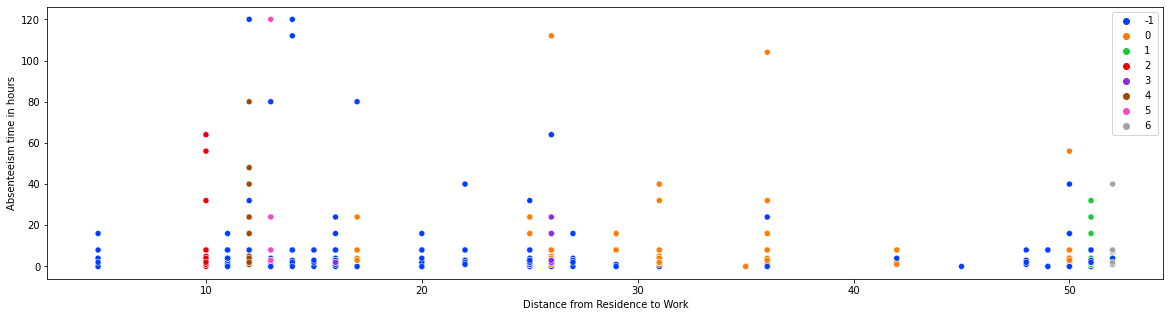

In [92]:
plt.figure(figsize=(20,5))
sns.scatterplot(df['Distance from Residence to Work'],df['Absenteeism time in hours'],hue=yp5,palette='bright');

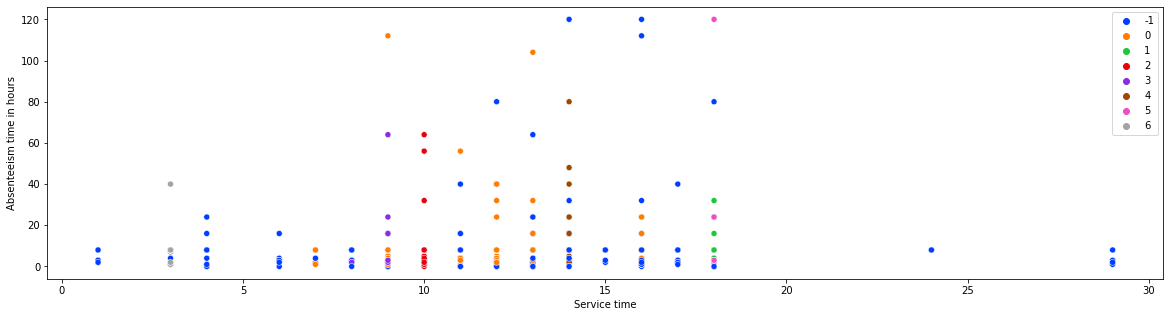

In [93]:
plt.figure(figsize=(20,5))
sns.scatterplot(df['Service time'],df['Absenteeism time in hours'],hue=yp5,palette='bright');

In [94]:
sdr=silhouette_score(pca_train,yp5)
print('Silhouette score:',round(sdr,4))

Silhouette score: 0.1242


### Interpretation:

In [95]:
dict={'Feature Extraction':['With out Extraction','With Feature Extraction(pca)'],'KMeans':[0.1455,0.1467],'Agglomerative clustering':[sab,sar],'DBSCAN':[sdb,sdr]}
compare=pd.DataFrame(dict)
compare

,Feature Extraction,KMeans,Agglomerative clustering,DBSCAN
0,With out Extraction,0.1455,0.171495,0.132951
1,With Feature Extraction(pca),0.1467,0.186059,0.124215


Agglomerative clustering model has better silhouette scores among all models

In [61]:
df.columns

Index(['Reason for absence', 'Month of absence', 'Day of the week', 'Seasons',
       'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours'],
      dtype='object')

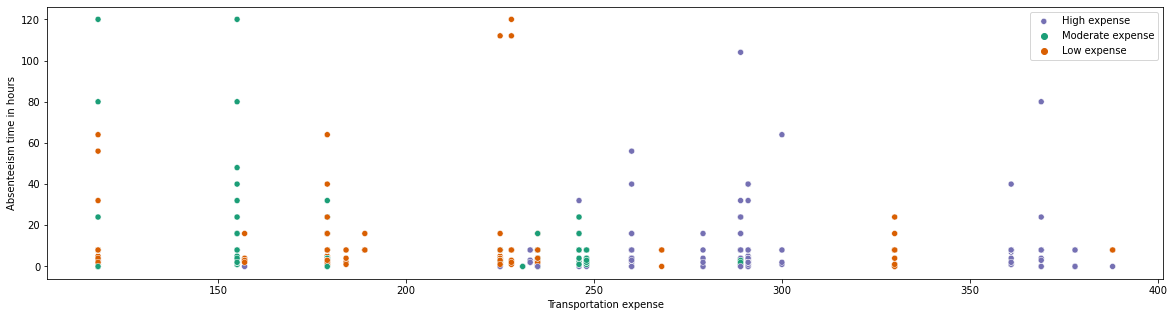

In [62]:
plt.figure(figsize=(20,5))
sns.scatterplot(df['Transportation expense'],df['Absenteeism time in hours'],hue=yp1,palette='Dark2')
plt.legend(['High expense','Moderate expense','Low expense'])



<AxesSubplot:xlabel='Month of absence', ylabel='Absenteeism time in hours'>

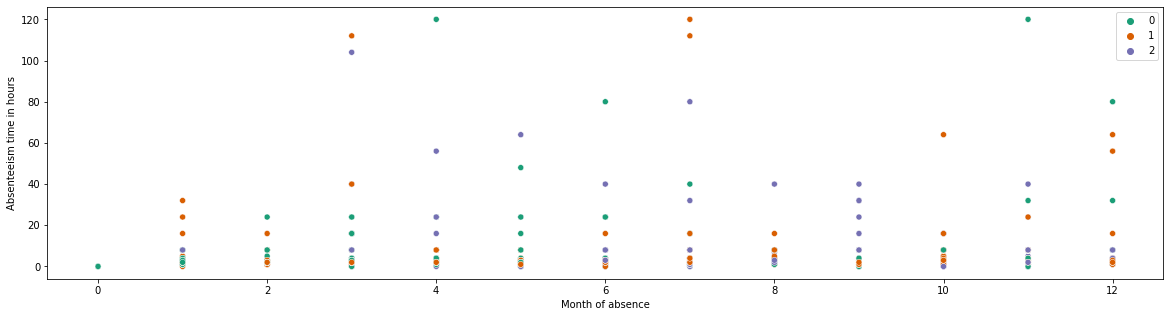

In [63]:
plt.figure(figsize=(20,5))
sns.scatterplot(df['Month of absence'],df['Absenteeism time in hours'],hue=yp1,palette='Dark2')
